# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [1]:
#pip install gym-chess

In [2]:
import chess
#import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
import random
import gymnasium as gym
#import numpy as np
from collections import deque
#import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

import cv2

import time
from tqdm.notebook import tqdm
from moviepy.editor import ImageSequenceClip
from IPython.display import clear_output

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [183]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [184]:
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is even, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

0.0


#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [5]:
pip install stockfish

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show numpy

Name: numpy
Version: 1.23.4
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: c:\users\isabe\anaconda3\envs\week5\lib\site-packages
Requires: 
Required-by: ale-py, contourpy, gym, gymnasium, h5py, imageio, jax, jax-jumpy, Keras-Applications, Keras-Preprocessing, matplotlib, ml-dtypes, moviepy, mujoco, mujoco-py, opencv-python, opt-einsum, pandas, scikit-learn, scipy, seaborn, tensorboard, tensorflow-intel, torchtext
Note: you may need to restart the kernel to use updated packages.


In [4]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [5]:
Stockfish_path = "C:/Users/isabe/Desktop/RL/Project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [413]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is even, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [414]:
def AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, BLACK_PLAYER_POLICY, n_evaluations=100): #changed
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, WHITE_PLAYER_POLICY) #changed

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, BLACK_PLAYER_POLICY) #changed

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

  0%|          | 0/5 [00:00<?, ?it/s]

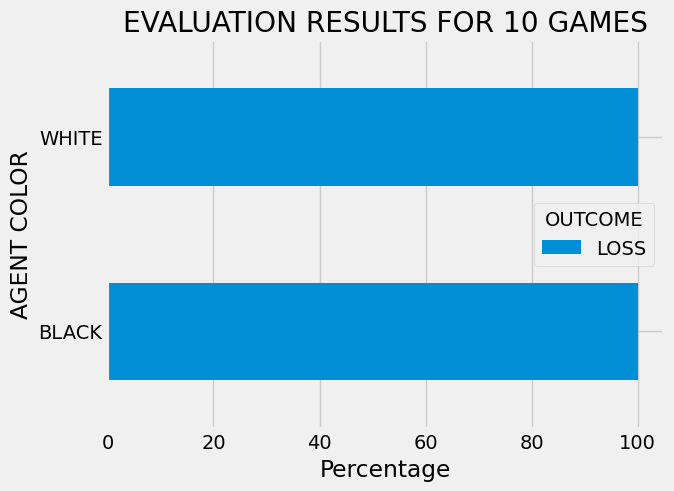

In [415]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, BLACK_PLAYER_POLICY, n_evaluations=5) #changed

In [12]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,28
1,BLACK,LOSS,7
2,WHITE,LOSS,11
3,BLACK,LOSS,27
4,WHITE,LOSS,19


# Ready to Play Chess?

In [86]:
def preprocess_state(state):
    state_boards= np.c_[state[:,:,:14], state[:,:,-7:]] #the state we want just has the current board and the last matrices with information
    return np.array([state_boards.reshape(8,8,21)])

In [6]:
# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

#set seed for random
random.seed(42)

Define the Deep Q-Network (DQN) model architecture using a neural network framework like TensorFlow. The model takes the state as input and outputs Q-values for each action.

In [88]:
class DQN:
    def __init__(self, state_size, env):
        #define environment
        self.env= env

        #define the state size
        self.state_size = state_size
        
        #define the action size
        self.action_size = len(env.legal_actions)
        
        #define the replay buffer
        self.replay_buffer = deque(maxlen=1000)
        
        #define the discount factor
        self.gamma = 0.9
        
        #define the epsilon value
        self.epsilon = 0.99
        
        #define the update rate at which we want to update the target network
        self.update_rate = 5
        
        #define the main network
        self.main_network = self.build_network()
        
        #define the target network
        self.target_network = self.build_network()
        
        #copy the weights of the main network to the target network
        self.target_network.set_weights(self.main_network.get_weights())

        #learning rate
        self.learning_rate = .0001
        

    #Let's define a function called build_network which is essentially our DQN. 

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(7, 7), strides=1, activation='relu', padding='same', input_shape=self.state_size))
        model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Flatten())
        model.add(Dense(216, activation='relu'))
        model.add(Dense(self.env.action_space.n, activation=None))

        model.compile(loss='mse', optimizer=Adam(learning_rate=.0001, epsilon=1e-7))


        return model

    #We learned that we train DQN by randomly sampling a minibatch of transitions from the
    #replay buffer. So, we define a function called store_transition which stores the transition information
    #into the replay buffer

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        

    #We learned that in DQN, to take care of exploration-exploitation trade off, we select action
    #using the epsilon-greedy policy. So, now we define the function called epsilon_greedy
    #for selecting action using the epsilon-greedy policy.
    def epsilon_greedy(self, state):
        if random.uniform(0,1) < self.epsilon:
            legal_actions = self.env.legal_actions
            action = np.random.choice(legal_actions)
            return action
        else:    
            Q_values = self.main_network.predict(state, verbose=0)[0]
            legal_q_values= Q_values[self.env.legal_actions]
            action= self.env.legal_actions[np.argmax(legal_q_values)]
            return action
    
    #train the network
    def train(self, batch_size):
        
        minibatch = np.array(random.sample(self.replay_buffer, batch_size), dtype=object)

        state_list = np.array(minibatch[:,0], dtype=object)
        state_list = np.hstack(state_list).reshape(batch_size, 8, 8, 21)

        next_state_list = np.array(minibatch[:,3])
        next_state_list = np.hstack(next_state_list).reshape(batch_size, 8, 8, 21)

        current_Q_values_list = self.main_network.predict(state_list, verbose=0)

        max_q = np.amax(self.target_network.predict(next_state_list, verbose=0), axis=1)

        for i, zip_ in enumerate(minibatch):

            state, action, reward, next_state, done = zip_

            if not done:
                target  = reward + self.gamma * max_q[i]
            else:
                target = reward

            updated_Q_value = target # (1 - self.learning_rate)*current_Q_values_list[i][action] + self.learning_rate*(target) # - current_Q_values_list[i][action]) # This is a different form of Q-learning (Min Q-Learning)

            current_Q_values_list[i][action] = updated_Q_value
        #train the main network
        self.main_network.fit(state_list, current_Q_values_list, epochs=1, verbose=0)
            
    #update the target network weights by copying from the main network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())
        

## Train Network

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [113]:
def generate_WHITE_scenario(Stockfish_path, dqn_white, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_white.state = env.reset()
    dqn_white.env= env
    dqn_white.state = preprocess_state(dqn_white.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is even, this means that it is the WHITE player's turn
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_white.update_rate == 0:
                dqn_white.update_target_network()

            # Select action to perform   
            action = dqn_white.epsilon_greedy(dqn_white.state)
            #print(action)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = env.step(action)
            real_reward= reward
            #pre-process next state
            next_state = preprocess_state(next_state)

            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, :6].sum() < dqn_white.state[:, :,:, :6].sum(): 
                reward += reward*abs(0.25)
            
            #update values in dqn class
            dqn_white.env= env

            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

            #update current state to next state
            dqn_white.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
                break

            #if nº transitions in replay_buffer>batch_size
            if (len(dqn_white.replay_buffer) > batch_size) & (counter/2 % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_white.train(batch_size)


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
                break

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2), dqn_white.state


def generate_BLACK_scenario(Stockfish_path, dqn_black, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_black.state = env.reset()
    dqn_black.env= env
    dqn_black.state = preprocess_state(dqn_black.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is even, this means that it is the WHITE player's turn
            
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_black.update_rate == 0:
                dqn_black.update_target_network()

            # Select action to perform   
            action = dqn_black.epsilon_greedy(dqn_black.state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = env.step(action)
            real_reward= reward

            #pre-process next state
            next_state = preprocess_state(next_state)
            
            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, 6:13].sum() < dqn_black.state[:, :,:, :6].sum(): 
                reward += reward*abs(0.25)

            #update values in dqn class
            dqn_black.env= env
            dqn_black.legal_actions = env.legal_actions

            #store the transition information
            dqn_black.store_transition(dqn_black.state, action, reward, next_state, done)

            #update current state to next state
            dqn_black.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_black.epsilon,2))
                break

            #if nº transitions in replay_buffer>batch_size
            if (len(dqn_black.replay_buffer) > batch_size) & (counter/2 % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_black.train(batch_size)


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)
            
            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
                break
        counter += 1

    env.close()

    return reward, np.ceil(counter / 2), dqn_black.state

In [114]:
def AGENT_EVALUATION(Stockfish_path, n_evaluations=100): #changed
    results_list = []
    env= gym.make("ChessAlphaZero-v0")
    env.reset()
    dqn_white= DQN((8, 8, 21), env)
    dqn_black= DQN((8, 8, 21), env)
    for evaluation_number in tqdm(range(n_evaluations)):
        #print('in white scenario')
        generate_episode = generate_WHITE_scenario
        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_white, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        results_list.append(["WHITE", result, n_steps, agent_pieces, opponent_pieces]) #PARA TODOS
        
        #update the epsilon
        dqn_white.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_white.epsilon = max(dqn_white.epsilon, 0.2) 

        #print('in black scenario')
        generate_episode = generate_BLACK_scenario

        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_black, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:,:,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        results_list.append(["BLACK", result, n_steps, agent_pieces, opponent_pieces]) #PARA TODOS

        #update the epsilon
        dqn_black.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_black.epsilon = max(dqn_black.epsilon, 0.2) 
        

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS", "AGENT PIECES", "OPPONENT PIECES"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df, dqn_black, dqn_white

  0%|          | 0/10 [00:00<?, ?it/s]

Episode:  0 , Return: 0 Steps: 29 Epsilon: 0.99 

Episode:  0 , Return: 0 Steps: 36 Epsilon: 0.2 

Episode:  1 , Return: 0 Steps: 27 Epsilon: 0.98 

Episode:  1 , Return: 0 Steps: 52 Epsilon: 0.2 

Episode:  2 , Return: 0 Steps: 31 Epsilon: 0.98 

Episode:  2 , Return: 0 Steps: 40 Epsilon: 0.2 

Episode:  3 , Return: 0 Steps: 23 Epsilon: 0.97 

Episode:  3 , Return: 0 Steps: 52 Epsilon: 0.2 

Episode:  4 , Return: 0 Steps: 37 Epsilon: 0.97 

Episode:  4 , Return: 0 Steps: 30 Epsilon: 0.2 

Episode:  5 , Return: 0 Steps: 35 Epsilon: 0.96 

Episode:  5 , Return: 0 Steps: 28 Epsilon: 0.2 

Episode:  6 , Return: 0 Steps: 27 Epsilon: 0.96 

Episode:  6 , Return: 0 Steps: 60 Epsilon: 0.2 

Episode:  7 , Return: 0 Steps: 51 Epsilon: 0.95 

Episode:  7 , Return: 0 Steps: 32 Epsilon: 0.2 

Episode:  8 , Return: 0 Steps: 19 Epsilon: 0.95 

Episode:  8 , Return: 0 Steps: 48 Epsilon: 0.2 

Episode:  9 , Return: 0 Steps: 41 Epsilon: 0.94 

Episode:  9 , Return: 0 Steps: 8 Epsilon: 0.2 



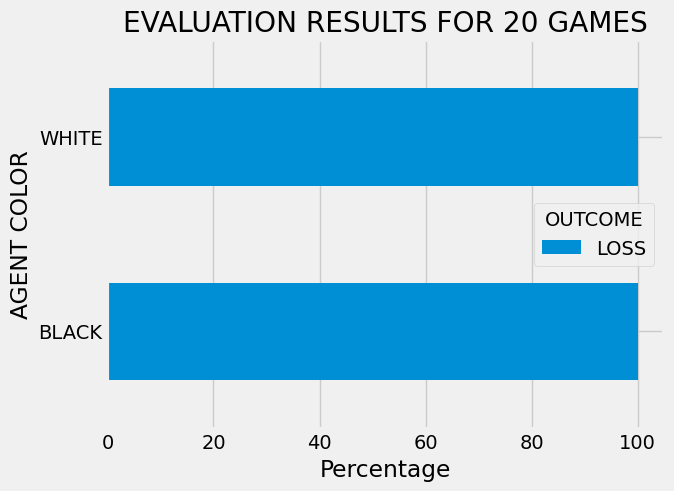

In [115]:
#number of episodes
num_episodes = 10 #00

# Define the batch size:
batch_size = 12#8

df, dqn_black, dqn_white = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) 

In [8]:
import gym
import gym_chess

  0%|          | 0/1000 [00:00<?, ?it/s]

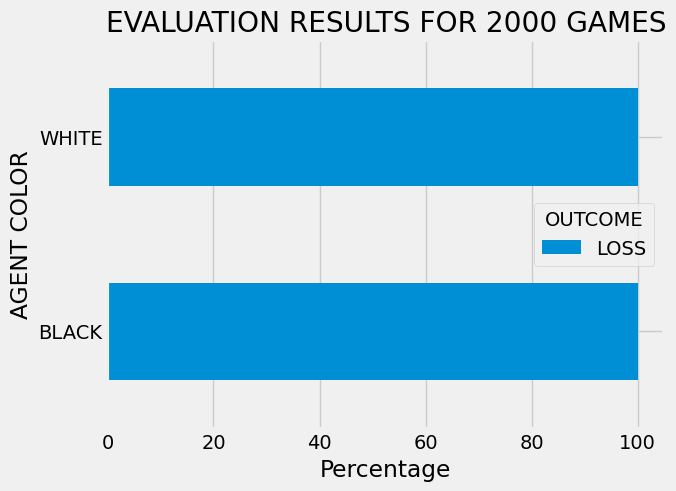

In [93]:
#number of episodes
num_episodes = 1000

# Define the batch size:
batch_size = 128

df, dqn_black, dqn_white = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) 

In [94]:
df.head()

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES
0,WHITE,LOSS,25,8,16
1,BLACK,LOSS,19,14,9
2,WHITE,LOSS,18,11,14
3,BLACK,LOSS,16,15,11
4,WHITE,LOSS,23,10,16


In [95]:
dqn_white.target_network.save('MODELS/target_chess_white.keras')
dqn_white.main_network.save('MODELS/main_chess_white.keras')
dqn_black.target_network.save('MODELS/target_chess_black.keras')
dqn_black.main_network.save('MODELS/main_chess_black.keras')

## Pre-made games

In [9]:
import chess.pgn
import io

pgn = open("C:/Users/isabe/Desktop/RL/Project/alphazero_stockfish_all/alphazero_vs_stockfish_all.pgn")

train_df=[]

for i in range(110):
    game=chess.pgn.read_game(pgn)
    # Process the moves, positions in board, rewards and outcome in the game
    moves = []
    positions = []
    rewards = []
    outcome = game.headers["Result"]
    if game.headers["White"]== "AlphaZero":
        color= "white"
    else:
        color= "black"

    board = game.board()
    for move in game.mainline_moves():
        board.push(move)
        moves.append(move)
        positions.append(board.fen())  # Save board position
        
    game_data = {
        "moves": moves,
        "positions": positions,
        "player_color": color,
        "outcome": outcome
    }

    train_df.append(game_data)



In [10]:
train_df = pd.DataFrame(train_df)
train_df.head()

,moves,positions,player_color,outcome
0,"[g1f3, g8f6, c2c4, e7e6, b1c3, f8b4, d1c2, e8g...",[rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R...,white,1-0
1,"[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0
2,"[d2d4, g8f6, c2c4, e7e6, g1f3, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0
3,"[g1f3, e7e6, c2c4, g8f6, b1c3, f8b4, d1c2, e8g...",[rnbqkbnr/pppppppp/8/8/8/5N2/PPPPPPPP/RNBQKB1R...,white,1-0
4,"[d2d4, g8f6, g1f3, e7e6, c2c4, b7b6, g2g3, c8b...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...,white,1-0


In [11]:
train_df.iloc[0]['moves'][132]


Move.from_uci('a5b6')

In [182]:
episode= 3
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
white_return = 0
black_return = 0
while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is even, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state, counter, episode)
        next_state, reward, done, info = env.step(action)
        if counter == len(train_df.iloc[episode]['moves'])-1: #last move of the game
            done= True
            if train_df.iloc[0]['outcome']== "1-0":
                reward= 1
            elif train_df.iloc[0]['outcome']== "1/2-1/2":
                reward= 0
  
        white_return += reward

    else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state, counter, episode)
        next_state, reward, done, info = env.step(action)
        if counter == len(train_df.iloc[episode]['moves'])-1: #last move of the game
            done= True
            if train_df.iloc[0]['outcome']== "0-1":
                reward= 1
            elif train_df.iloc[0]['outcome']== "1/2-1/2":
                reward= 0
        black_return += reward

    counter += 1
    
print("white won" if white_return>black_return else 'black won')
if train_df.iloc[0]['outcome']== "1-0":
    white_return= 1
    black_return= 0
    print('white won')
elif train_df.iloc[0]['outcome']== "1-0":
    white_return= 0
    black_return= 1
    print('black won')
else:
    white_return= 1
    black_return= 1
    print('draw')    


env.close()

white won
white won


In [22]:
def WHITE_PLAYER_POLICY(env, state, step, episode):
    encoded_move = env.encode(train_df.iloc[episode]['moves'][step])
    #action = {"from_square": encoded_move.from_square, "to_square": encoded_move.to_square}
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)
    return encoded_move


def BLACK_PLAYER_POLICY(env, state, step, episode):
    encoded_move = env.encode(train_df.iloc[episode]['moves'][step])
    #encoded_move = env.encode(train_df[0][step])
    #action = {"from_square": encoded_move.from_square, "to_square": encoded_move.to_square}
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return encoded_move

In [23]:
def preprocess_state(state):
    state_boards= np.c_[state[:,:,:14], state[:,:,-7:]] #the state we want just has the current board and the last matrices with information
    return np.array([state_boards.reshape(8,8,21)])

In [24]:
# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

#set seed for random
random.seed(42)

In [25]:
class DQN:
    def __init__(self, state_size, env):
        #define environment
        self.env= env

        #define the state size
        self.state_size = state_size
        
        #define the action size
        self.action_size = len(env.legal_actions)
        
        #define the replay buffer
        self.replay_buffer = deque(maxlen=1000)
        
        #define the discount factor
        self.gamma = 0.9
        
        #define the epsilon value
        self.epsilon = 0.99
        
        #define the update rate at which we want to update the target network
        self.update_rate = 5
        
        #define the main network
        self.main_network = self.build_network()
        
        #define the target network
        self.target_network = self.build_network()
        
        #copy the weights of the main network to the target network
        self.target_network.set_weights(self.main_network.get_weights())

        #learning rate
        self.learning_rate = .0001
        

    #Let's define a function called build_network which is essentially our DQN. 

    def build_network(self):
        model = Sequential()
        model.add(Conv2D(filters=6, kernel_size=(7, 7), strides=1, activation='relu', padding='same', input_shape=self.state_size))
        model.add(Conv2D(filters=6, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
        model.add(Conv2D(filters=12, kernel_size=(3, 3), strides=2, activation='relu', padding='same'))
        model.add(Flatten())
        model.add(Dense(216, activation='relu'))
        model.add(Dense(self.env.action_space.n, activation=None))

        model.compile(loss='mse', optimizer=Adam(learning_rate=.0001, epsilon=1e-7))


        return model

    #We learned that we train DQN by randomly sampling a minibatch of transitions from the
    #replay buffer. So, we define a function called store_transition which stores the transition information
    #into the replay buffer

    def store_transition(self, state, action, reward, next_state, done):
        self.replay_buffer.append((state, action, reward, next_state, done))
        

    #We learned that in DQN, to take care of exploration-exploitation trade off, we select action
    #using the epsilon-greedy policy. So, now we define the function called epsilon_greedy
    #for selecting action using the epsilon-greedy policy.
    def epsilon_greedy(self, state):
        if random.uniform(0,1) < self.epsilon:
            legal_actions = self.env.legal_actions
            action = np.random.choice(legal_actions)
            return action
        else:    
            Q_values = self.main_network.predict(state, verbose=0)[0]
            legal_q_values= Q_values[self.env.legal_actions]
            action= self.env.legal_actions[np.argmax(legal_q_values)]
            return action
    
    #train the network
    def train(self, batch_size):
        
        minibatch = np.array(random.sample(self.replay_buffer, batch_size), dtype=object)

        state_list = np.array(minibatch[:,0], dtype=object)
        state_list = np.hstack(state_list).reshape(batch_size, 8, 8, 21)

        next_state_list = np.array(minibatch[:,3])
        next_state_list = np.hstack(next_state_list).reshape(batch_size, 8, 8, 21)

        current_Q_values_list = self.main_network.predict(state_list, verbose=0)

        max_q = np.amax(self.target_network.predict(next_state_list, verbose=0), axis=1)

        for i, zip_ in enumerate(minibatch):

            state, action, reward, next_state, done = zip_

            if not done:
                target  = reward + self.gamma * max_q[i]
            else:
                target = reward

            updated_Q_value = target # (1 - self.learning_rate)*current_Q_values_list[i][action] + self.learning_rate*(target) # - current_Q_values_list[i][action]) # This is a different form of Q-learning (Min Q-Learning)

            current_Q_values_list[i][action] = updated_Q_value
        #train the main network
        self.main_network.fit(state_list, current_Q_values_list, epochs=1, verbose=0)
            
    #update the target network weights by copying from the main network
    def update_target_network(self):
        self.target_network.set_weights(self.main_network.get_weights())

In [33]:
def generate_WHITE_scenario(Stockfish_path, dqn_white, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_white.state = env.reset()
    dqn_white.env= env
    dqn_white.state = preprocess_state(dqn_white.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is even, this means that it is the WHITE player's turn
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_white.update_rate == 0:
                dqn_white.update_target_network()

            # Select action to perform   
            action = dqn_white.epsilon_greedy(dqn_white.state)
            #print(action)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = dqn_white.env.step(action)
            real_reward= reward
            #pre-process next state
            next_state = preprocess_state(next_state)

            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, :6].sum() < dqn_white.state[:, :,:, :6].sum(): 
                reward += reward*abs(0.25)
            
            #update values in dqn class
            dqn_white.env= env

            #store the transition information
            dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

            #update current state to next state
            dqn_white.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
                break

            #if nº transitions in replay_buffer>batch_size
            if (len(dqn_white.replay_buffer) > batch_size) & (counter/2 % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_white.train(batch_size)


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_white.epsilon,2))
                break

        counter += 1

    env.close()

    return reward, np.ceil(counter / 2), dqn_white.state


def generate_BLACK_scenario(Stockfish_path, dqn_black, evaluation_number):
    env = gym.make("ChessAlphaZero-v0") # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system
    
    #pre-process state
    dqn_black.state = env.reset()
    dqn_black.env= env
    dqn_black.state = preprocess_state(dqn_black.state)
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
    # set return to 0
    Return = 0 
    Real_Return = 0

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is even, this means that it is the WHITE player's turn
            
            #Update target model if the correct nº episodes has passed
            if evaluation_number % dqn_black.update_rate == 0:
                dqn_black.update_target_network()

            # Select action to perform   
            action = dqn_black.epsilon_greedy(dqn_black.state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])

            # Perform selected action
            next_state, reward, done, info = dqn_black.env.step(action)
            real_reward= reward

            #pre-process next state
            next_state = preprocess_state(next_state)
            
            #if player removed piece from opponent, increase reward
            if next_state[:, :,:, 6:13].sum() < dqn_black.state[:, :,:, :6].sum(): 
                reward += reward*abs(0.25)

            #update values in dqn class
            dqn_black.env= env
            dqn_black.legal_actions = env.legal_actions

            #store the transition information
            dqn_black.store_transition(dqn_black.state, action, reward, next_state, done)

            #update current state to next state
            dqn_black.state = next_state

            #update the return
            Return += reward
            Real_Return += real_reward

            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_black.epsilon,2))
                break

            #if nº transitions in replay_buffer>batch_size
            if (len(dqn_black.replay_buffer) > batch_size) & (counter/2 % 10 == 0): # Only train each 10 steps that the agent plays
                dqn_black.train(batch_size)


        else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)
            
            #print return if episode finished
            if done:
                print('Episode: ',evaluation_number, ', Return:', round(Return), 'Steps:', counter, 'Epsilon:', round(dqn_black.epsilon,2))
                break
        counter += 1

    env.close()

    return reward, np.ceil(counter / 2), dqn_black.state

In [34]:
def AGENT_EVALUATION(Stockfish_path, n_evaluations=100): #changed
    results_list = []
    env= gym.make("ChessAlphaZero-v0")
    env.reset()
    dqn_white= DQN((8, 8, 21), env)
    dqn_black= DQN((8, 8, 21), env)
    for game in range(len(train_df)):
        env = gym.make(
            "ChessAlphaZero-v0"
        )  # We will use Alpha Zero's numenclature for the actions encodings
        dqn_white.state = env.reset()
        dqn_white.env= env
        dqn_white.state = preprocess_state(dqn_white.state)

        dqn_black.state = env.reset()
        dqn_black.env= env
        dqn_black.state = preprocess_state(dqn_black.state)
        state = env.reset()
        done = False
        counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game
        while not done:
            if (
                counter % 2 == 0
            ):  # If the step number is even, this means that it is the WHITE player's turn
                
                action = WHITE_PLAYER_POLICY(env, state, counter, game)

                #perform action
                next_state, reward, done, info = dqn_white.env.step(action)

                if counter == len(train_df.iloc[game]['moves'])-1: #last move of the game
                    done= True
                    if train_df.iloc[game]['outcome']== "1-0":
                        reward= 1
                    elif train_df.iloc[game]['outcome']== "1/2-1/2":
                        reward= 0
                
                #save state in the right format
                next_state = preprocess_state(next_state)

                #store the transition information
                dqn_white.store_transition(dqn_white.state, action, reward, next_state, done)

                #update current state to next state
                dqn_white.state = next_state

            else:  # If the step number is not even, aka odd, this means that it is the BLACK player's turn
                action = BLACK_PLAYER_POLICY(env, state, counter, game)

                #perform action
                next_state, reward, done, info = dqn_black.env.step(action)

                if counter == len(train_df.iloc[game]['moves'])-1: #last move of the game
                    done= True
                    if train_df.iloc[game]['outcome']== "0-1":
                        reward= 1
                    elif train_df.iloc[game]['outcome']== "1/2-1/2":
                        reward= 0
                
                #save state in the right format
                next_state = preprocess_state(next_state)

                #store the transition information
                dqn_black.store_transition(dqn_black.state, action, reward, next_state, done)

                #update current state to next state
                dqn_black.state = next_state

            counter += 1

        dqn_white.env.close()   
        dqn_black.env.close()          


    for evaluation_number in tqdm(range(n_evaluations)): #PARA TODOS
        #print('in white scenario')
        generate_episode = generate_WHITE_scenario
        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_white, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        results_list.append(["WHITE", result, n_steps, agent_pieces, opponent_pieces, evaluation_number]) #PARA TODOS
        
        #update the epsilon
        dqn_white.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_white.epsilon = max(dqn_white.epsilon, 0.2) 

        #print('in black scenario')
        generate_episode = generate_BLACK_scenario

        reward, n_steps, last_state = generate_episode(Stockfish_path, dqn_black, evaluation_number) #PARA TODOS (last_state)->retornar no generate ep

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        agent_pieces= last_state[:,:,:, :6].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        opponent_pieces= last_state[:, :,:, 6:13].sum() #PARA TODOS: podem ter de ajustar para [:, :,:6]
        results_list.append(["BLACK", result, n_steps, agent_pieces, opponent_pieces, evaluation_number]) #PARA TODOS

        #update the epsilon
        dqn_black.epsilon -= .005 # dqn.epsilon/num_episodes
        dqn_black.epsilon = max(dqn_black.epsilon, 0.2) 
        

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS", "AGENT PIECES", "OPPONENT PIECES", "N OF EPISODE"]  #PARA TODOS
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df, dqn_black, dqn_white

  0%|          | 0/20 [00:00<?, ?it/s]

Episode:  0 , Return: 0 Steps: 43 Epsilon: 0.99
Episode:  0 , Return: 0 Steps: 48 Epsilon: 0.99
Episode:  1 , Return: 0 Steps: 45 Epsilon: 0.98
Episode:  1 , Return: 0 Steps: 20 Epsilon: 0.98
Episode:  2 , Return: 0 Steps: 59 Epsilon: 0.98
Episode:  2 , Return: 0 Steps: 22 Epsilon: 0.98
Episode:  3 , Return: 0 Steps: 43 Epsilon: 0.97
Episode:  3 , Return: 0 Steps: 32 Epsilon: 0.97
Episode:  4 , Return: 0 Steps: 45 Epsilon: 0.97
Episode:  4 , Return: 0 Steps: 16 Epsilon: 0.97
Episode:  5 , Return: 0 Steps: 25 Epsilon: 0.96
Episode:  5 , Return: 0 Steps: 34 Epsilon: 0.96
Episode:  6 , Return: 0 Steps: 41 Epsilon: 0.96
Episode:  6 , Return: 0 Steps: 46 Epsilon: 0.96
Episode:  7 , Return: 0 Steps: 21 Epsilon: 0.95
Episode:  7 , Return: 0 Steps: 8 Epsilon: 0.95
Episode:  8 , Return: 0 Steps: 31 Epsilon: 0.95
Episode:  8 , Return: 0 Steps: 40 Epsilon: 0.95
Episode:  9 , Return: 0 Steps: 33 Epsilon: 0.94
Episode:  9 , Return: 0 Steps: 24 Epsilon: 0.94
Episode:  10 , Return: 0 Steps: 23 Epsilo

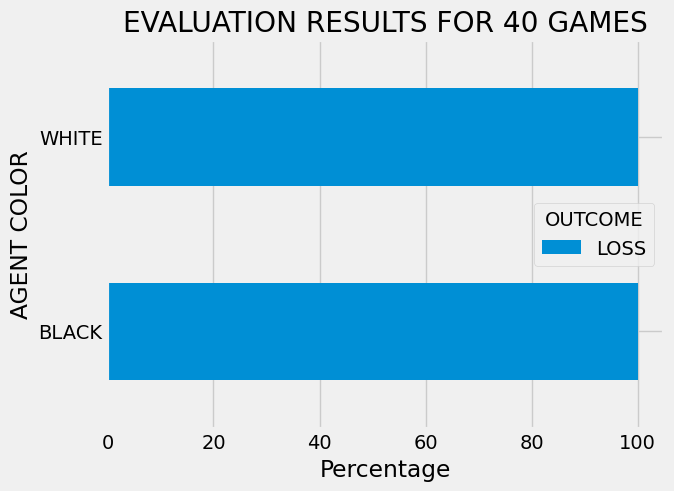

In [35]:
#number of episodes
num_episodes = 20 #1000

# Define the batch size:
batch_size = 32 #128

df, dqn_black, dqn_white = AGENT_EVALUATION(Stockfish_path, n_evaluations=num_episodes) 

In [36]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS,AGENT PIECES,OPPONENT PIECES,N OF EPISODE
0,WHITE,LOSS,22,11,14,0
1,BLACK,LOSS,24,14,8,0
2,WHITE,LOSS,23,6,14,1
3,BLACK,LOSS,10,16,13,1
4,WHITE,LOSS,30,7,14,2
